In [3876]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
import lightgbm as lgb
warnings.filterwarnings(action='ignore')

In [3877]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-Glass-Quality-Prediction\Test.csv')

In [3878]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [3879]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [3880]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [3881]:
test.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02,5.830000e+02,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.385935,0.614065,136.662093,78.149228,588.096055,635.425386,1.628701e+06,1.628821e+06,2368.331046,2368.838180,0.080617,0.078902,0.210978,0.041166,0.029160
std,0.487233,0.487233,20.112588,54.858769,517.598327,491.010380,1.767507e+06,1.767550e+06,7376.877610,7376.880091,0.272481,0.269818,0.408353,0.198845,0.168398
min,0.000000,0.000000,43.000000,35.000000,1.000000,9.000000,7.438000e+03,7.414000e+03,22.000000,22.200599,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,126.000000,42.000000,60.000000,198.000000,4.947205e+05,4.957495e+05,235.000000,235.420439,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,137.000000,65.000000,484.000000,518.000000,1.168512e+06,1.169583e+06,376.000000,376.661070,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,146.000000,85.000000,1064.500000,1081.500000,2.105844e+06,2.105480e+06,1268.500000,1268.945018,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,232.000000,305.000000,1709.000000,1718.000000,1.298687e+07,1.298686e+07,152727.000000,152727.515949,1.000000,1.000000,1.000000,1.000000,1.000000


In [3882]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
grade_A_Component_1    1358 non-null int64
grade_A_Component_2    1358 non-null int64
max_luminosity         1358 non-null int64
thickness              1358 non-null int64
xmin                   1358 non-null int64
xmax                   1358 non-null int64
ymin                   1358 non-null int64
ymax                   1358 non-null int64
pixel_area             1358 non-null int64
log_area               1358 non-null float64
x_component_1          1358 non-null int64
x_component_2          1358 non-null int64
x_component_3          1358 non-null int64
x_component_4          1358 non-null int64
x_component_5          1358 non-null int64
class                  1358 non-null int64
dtypes: float64(1), int64(15)
memory usage: 169.8 KB


In [3883]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 15 columns):
grade_A_Component_1    583 non-null int64
grade_A_Component_2    583 non-null int64
max_luminosity         583 non-null int64
thickness              583 non-null int64
xmin                   583 non-null int64
xmax                   583 non-null int64
ymin                   583 non-null int64
ymax                   583 non-null int64
pixel_area             583 non-null int64
log_area               583 non-null float64
x_component_1          583 non-null int64
x_component_2          583 non-null int64
x_component_3          583 non-null int64
x_component_4          583 non-null int64
x_component_5          583 non-null int64
dtypes: float64(1), int64(14)
memory usage: 68.4 KB


In [3884]:
train.shape , test.shape

((1358, 16), (583, 15))

In [3885]:
train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5'])['class'].value_counts()

x_component_1  x_component_2  x_component_3  x_component_4  x_component_5  class
0              0              0              0              0              2        471
                                                                           1        278
                                                            1              1         38
                                             1              0              1         48
                              1              0              0              1        268
               1              0              0              0              1        144
1              0              0              0              0              1        111
Name: class, dtype: int64

In [3886]:
train= train.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0)).reset_index(drop = True)

In [3887]:
ind_1 = []
ind_1.extend(test[test.x_component_1==1].index.tolist())
ind_1.extend(test[test.x_component_2==1].index.tolist())
ind_1.extend(test[test.x_component_3==1].index.tolist())
ind_1.extend(test[test.x_component_4==1].index.tolist())
ind_1.extend(test[test.x_component_5==1].index.tolist())
len(ind_1)

257

In [3888]:
test = test.groupby(['x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5']).get_group((0,0,0,0,0))

In [3889]:
len(test)

326

In [3890]:
train['class'] = train['class'].astype('category')

# WORK

In [3891]:
train.groupby(['grade_A_Component_1','grade_A_Component_2'])['class'].value_counts()

grade_A_Component_1  grade_A_Component_2  class
0                    1                    2        285
                                          1         85
1                    0                    1        193
                                          2        186
Name: class, dtype: int64

# Max

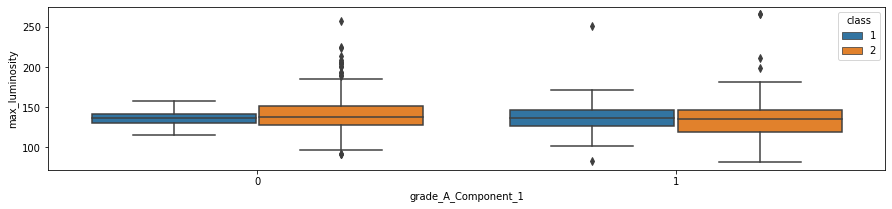

In [3892]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train,x='grade_A_Component_1',y='max_luminosity',hue='class')

# Thickness

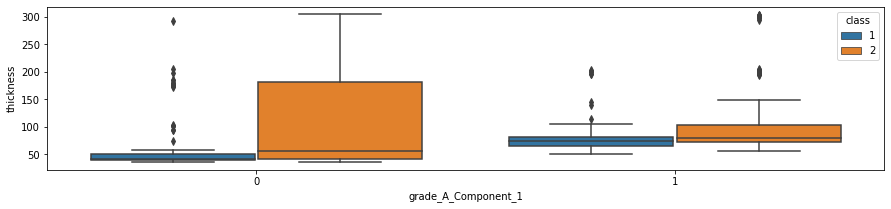

In [3893]:
plt.figure(figsize=(15,3))
sns.boxplot(data=train,x='grade_A_Component_1',y='thickness',hue='class')

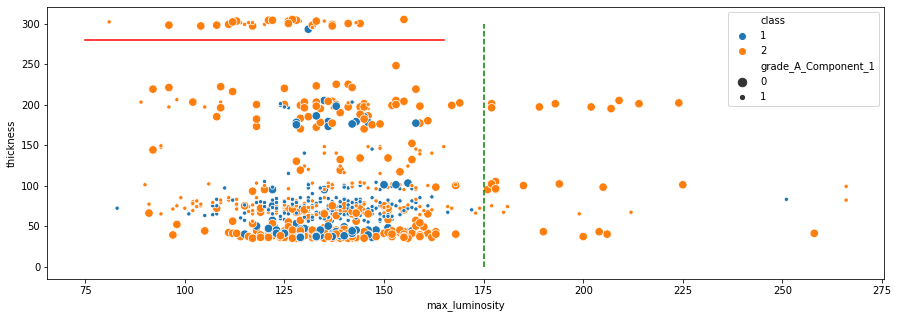

In [3894]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='max_luminosity',y='thickness',hue='class',size='grade_A_Component_1')
plt.plot([175,175],[0,300], 'g--')
plt.plot([75,165],[280,280], 'r-')

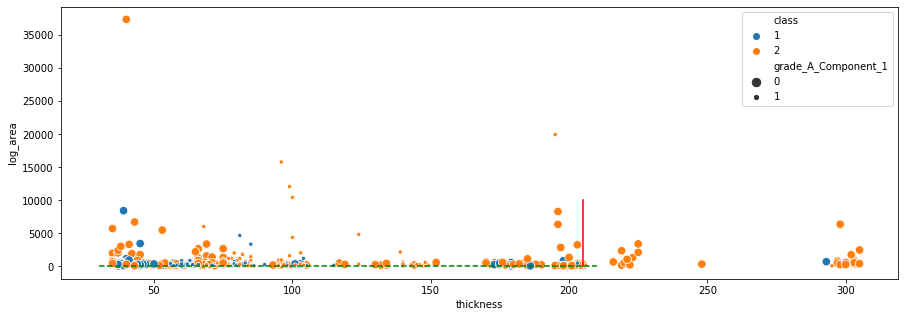

In [3895]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=train['thickness'],y=(train['log_area']),hue=train['class'],size=train['grade_A_Component_1'])
plt.plot([30,210],[7.4,7.4], 'g--')
plt.plot([205,205],[40,10000], 'r-')

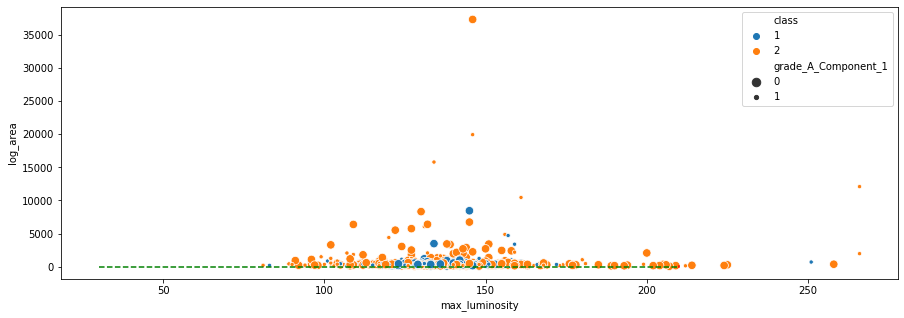

In [3896]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=train['max_luminosity'],y=(train['log_area']),hue=train['class'],size=train['grade_A_Component_1'])
plt.plot([30,210],[7.4,7.4], 'g--')
plt.plot([210,210],[4,10], 'r-')

train.log_area = np.log1p(train['log_area'])
test.log_area = np.log1p(test['log_area'])

In [3897]:
train.shape, test.shape

((749, 16), (326, 15))

In [3811]:
ind_2 = []
ind_2.extend(train[train.max_luminosity>175].index.tolist())
ind_2.extend(train[train.thickness>280].index.tolist())
#ind_2.extend(train[train.log_area>7.4].index.tolist())
train.drop(index = set(ind_2), inplace = True)
train.reset_index(drop = True, inplace = True)
len(ind_2)

63

In [3812]:
ind_2 = []
ind_2.extend(test[test.max_luminosity>175].index.tolist())
ind_2.extend(test[test.thickness>280].index.tolist())
#ind_2.extend(test[test.log_area>7.4].index.tolist())
test.drop(index = set(ind_2), inplace = True)
len(set(ind_2))
ind_2 = set(ind_2)

In [3813]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 1 to 578
Data columns (total 15 columns):
grade_A_Component_1    306 non-null int64
grade_A_Component_2    306 non-null int64
max_luminosity         306 non-null int64
thickness              306 non-null int64
xmin                   306 non-null int64
xmax                   306 non-null int64
ymin                   306 non-null int64
ymax                   306 non-null int64
pixel_area             306 non-null int64
log_area               306 non-null float64
x_component_1          306 non-null int64
x_component_2          306 non-null int64
x_component_3          306 non-null int64
x_component_4          306 non-null int64
x_component_5          306 non-null int64
dtypes: float64(1), int64(14)
memory usage: 38.2 KB


In [3814]:
len(ind_1), len(ind_2)

(257, 20)

In [3815]:
326-20

306

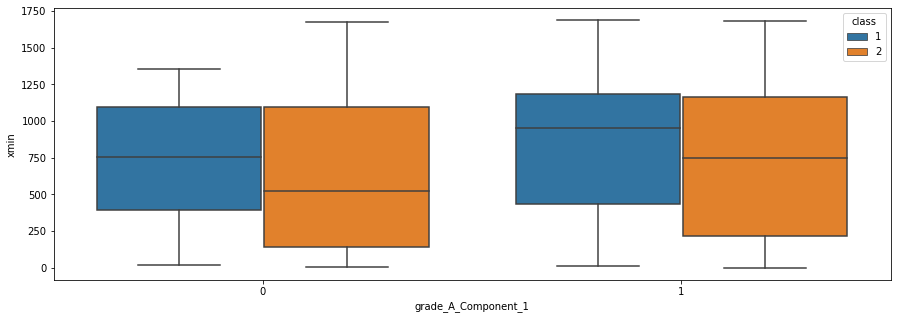

In [3816]:
plt.figure(figsize=(15,5))
sns.boxplot(data=train,x='grade_A_Component_1', y='xmin',hue='class')

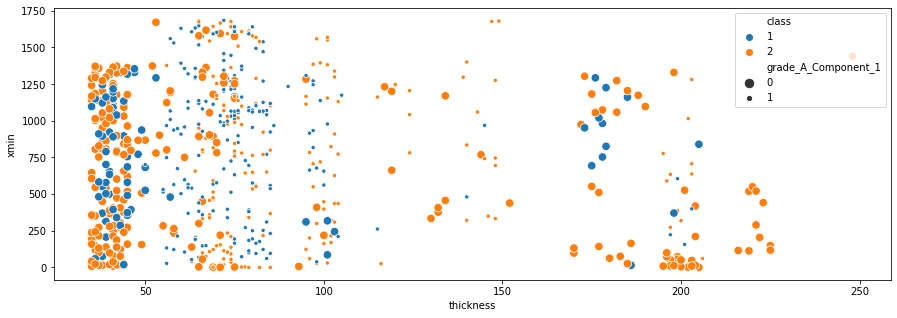

In [3817]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='xmin',hue='class',size='grade_A_Component_1')

xmax

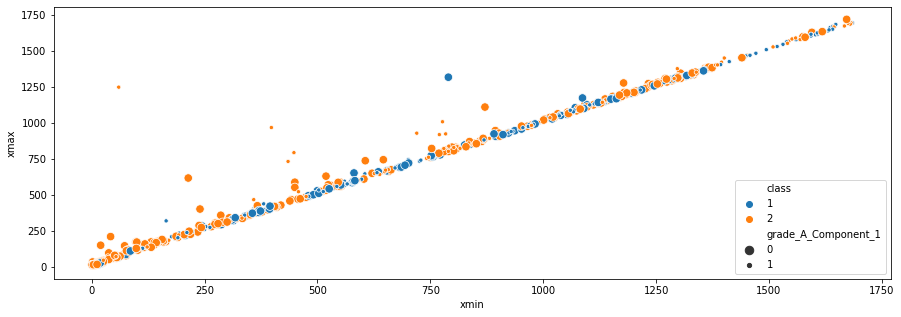

In [3818]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='xmin',y='xmax',hue='class',size='grade_A_Component_1')

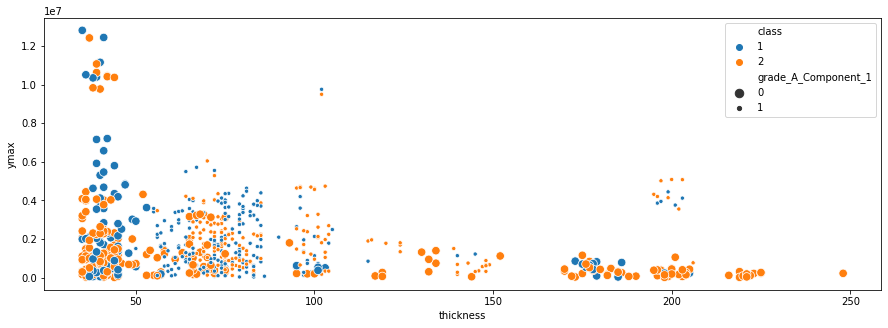

In [3820]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='ymax',hue='class',size='grade_A_Component_1')

# YMAXMIN

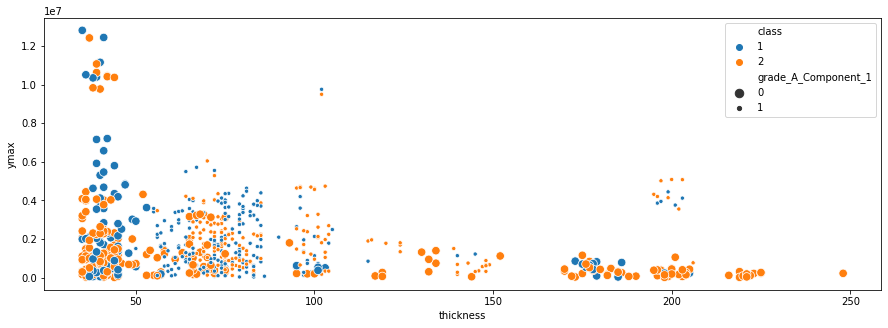

In [3821]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='ymax',hue='class',size='grade_A_Component_1')

In [3822]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2


# Pixel area

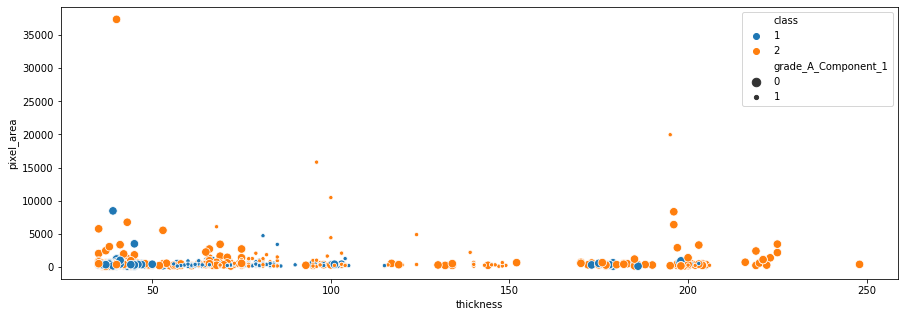

In [3823]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='pixel_area',hue='class',size='grade_A_Component_1')

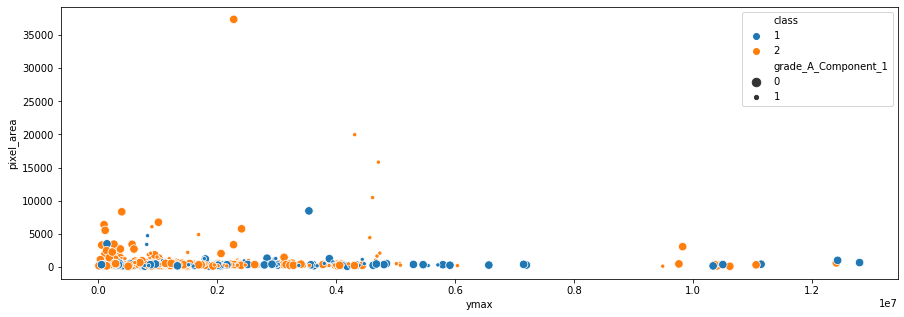

In [3824]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='ymax',y='pixel_area',hue='class',size='grade_A_Component_1')

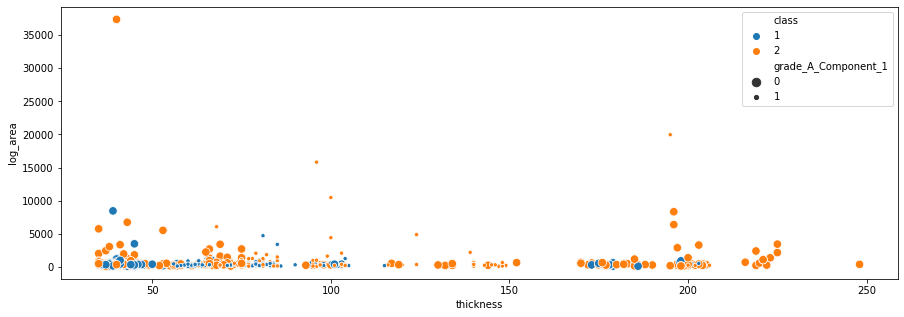

In [3825]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=train,x='thickness',y='log_area',hue='class',size='grade_A_Component_1')

# Main

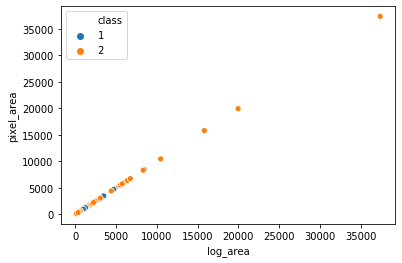

In [3826]:
sns.scatterplot(data = train , x='log_area' , y='pixel_area' , hue = 'class')

In [3827]:
train['y_diff'] = train['ymax'] - train['ymin']
#train['diff_area'] = train['log_area'] - train['pixel_area']
#train['area'] = train.y_diff * train.x_diff

test['y_diff'] = test['ymax'] - test['ymin']
#test['diff_area'] = test['log_area'] - test['pixel_area']
#test['area'] = test.y_diff * test.x_diff

train.y_diff = np.where(train.y_diff>0, 1, 0)
test.y_diff = np.where(test.y_diff>0, 1, 0)

train.drop(columns = [ 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
test.drop(columns = [ 'x_component_1','x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)
#test.drop(columns = ['grade_A_Component_2','x_component_1', 'x_component_2', 'x_component_3', 'x_component_4', 'x_component_5', 'pixel_area'], inplace = True)

In [3829]:
train.groupby(['grade_A_Component_1', 'y_diff'])['class'].value_counts()

grade_A_Component_1  y_diff  class
0                    0       2        106
                             1         43
                     1       2        135
                             1         41
1                    0       1         93
                             2         82
                     1       1         99
                             2         87
Name: class, dtype: int64

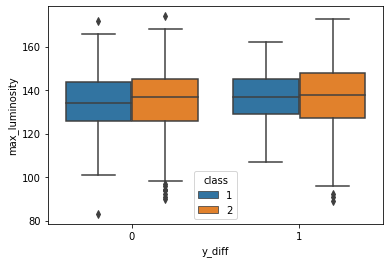

In [3830]:
sns.boxplot(train.y_diff, train.max_luminosity, hue = train['class'])

In [3831]:
label = train['class']
del train['class']
label = label.astype('int')

In [3832]:
train.shape, label.shape, test.shape

((686, 10), (686,), (306, 10))

In [3833]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff
0,1,0,135,65,950,974,1038442,1036754,300.120598,0


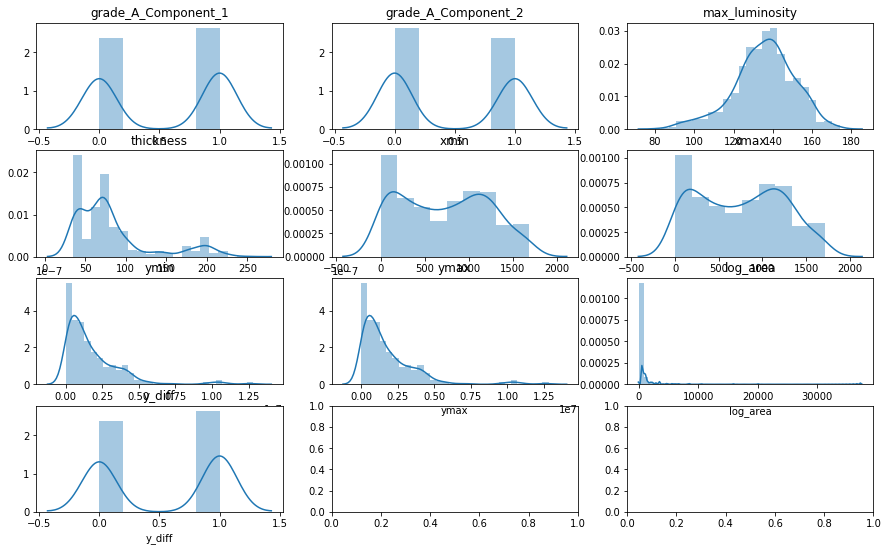

In [3834]:
fig, ax = plt.subplots(4,3, figsize = (15,9))
for i, c in enumerate(train.columns) :
    plt.subplot(4,3,i+1)
    plt.title(train.columns[i])
    sns.distplot(train[c], hist=70)

In [3835]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff
0,1,0,135,65,950,974,1038442,1036754,300.120598,0


func = {'max_luminosity':['mean', 'median', 'sum', 'min', 'max'], 
        'thickness':['mean', 'median', 'sum', 'min', 'max'],
        'xmin': ['mean', 'median', 'sum', 'min', 'max'],
        'xmax': ['mean', 'median', 'sum', 'min', 'max'],
        'ymin': ['mean', 'median', 'sum', 'min', 'max'],
        'ymax': ['mean', 'median', 'sum', 'min', 'max'],
        'log_area': ['mean', 'median', 'sum', 'min', 'max'],
       }
temp_2  = train.groupby(['y_diff', 'x_diff']).agg(func)
temp_2.columns = ['_grade_'.join(c) for c in temp_2.columns.values]

train = train.merge(temp_2, on = ['y_diff', 'x_diff'], how = 'left', sort=False)



In [3836]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,log_area,y_diff
0,1,0,135,65,950,974,1038442,1036754,300.120598,0


train['sum'] = np.sum(train, axis = 1)
train['mean'] = np.mean(train, axis = 1)
train['median'] = np.median(train, axis = 1)
train['min'] = np.min(train, axis = 1)
train['max'] = np.max(train, axis = 1)
train['skew'] = train.skew(axis = 1)
train['kurt'] = train.kurt(axis = 1)

test['sum'] = np.sum(test, axis = 1)
test['mean'] = np.mean(test, axis = 1)
test['median'] = np.median(test, axis = 1)
test['min'] = np.min(test, axis = 1)
test['max'] = np.max(test, axis = 1)
test['skew'] = test.skew(axis = 1)
test['kurt'] = test.kurt(axis = 1)

mm = MinMaxScaler()
train = pd.DataFrame(mm.fit_transform(train), columns = train.columns)
test = pd.DataFrame(mm.fit_transform(test), columns = test.columns)

# ML

In [3837]:
train.shape, label.shape, test.shape

((686, 10), (686,), (306, 10))

In [3842]:
prediction =[]
def kfold(model,train,label, test, Random_state):
    strat = StratifiedShuffleSplit(n_splits=5, random_state=Random_state)
    
    for tr_index, val_index in (strat.split(train,label)):
            x_train, x_val  = train.loc[tr_index,:],train.loc[val_index,:]
            y_train, y_val = label[tr_index], label[val_index]
            
            model.fit(x_train, y_train)
            tr_pred = model.predict_proba(x_train)
            val_pred = model.predict_proba(x_val)
            
            print('Training Loss : {},   Validation Loss : {}'.format(log_loss(y_train, tr_pred), log_loss(y_val, val_pred)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(accuracy_score(tr_pred, y_train), accuracy_score(val_pred, y_val)))
          #  print('Training Loss : {},   Validation Loss : {})'.format(classification_report(tr_pred, y_train), classification_report(val_pred, y_val)))
    #return(model)
    return(model.predict_proba(test), model)

In [3839]:
model = kfold(GradientBoostingClassifier(random_state=130),train,label,test,310)

Training Loss : 0.3177686240055442,   Validation Loss : 0.5262037483524784
Training Loss : 0.3049013461954732,   Validation Loss : 0.6477122236106002
Training Loss : 0.3248319632611561,   Validation Loss : 0.5453367498908901
Training Loss : 0.3164270725082545,   Validation Loss : 0.5791628274702558
Training Loss : 0.30673093060826023,   Validation Loss : 0.6313104436201818


In [3843]:
pred, model = kfold(RandomForestClassifier(random_state=2210),train,label,test,1220)

Training Loss : 0.14263320369320193,   Validation Loss : 0.5855234679714174
Training Loss : 0.14563727439401666,   Validation Loss : 0.5642362487411393
Training Loss : 0.1457745755840416,   Validation Loss : 0.4826220662791272
Training Loss : 0.14717931071020893,   Validation Loss : 0.5006128110468159
Training Loss : 0.14630907144125352,   Validation Loss : 0.46715675596972683


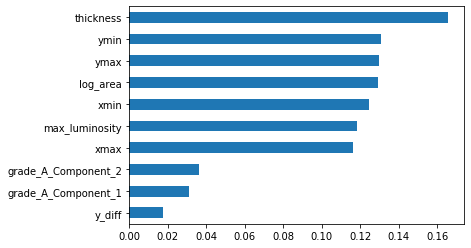

In [3844]:
pd.Series(model.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()

In [3035]:
pred = kfold(lgb.LGBMClassifier(class_weight='balanced', random_state=312),train,label,test,909)

Training Loss : 0.10020526223203531,   Validation Loss : 0.6496556594053997
Training Loss : 0.09994211214905732,   Validation Loss : 0.7428952161167026
Training Loss : 0.10165692428561945,   Validation Loss : 0.6004329895858197
Training Loss : 0.10042967606448079,   Validation Loss : 0.598630133286402
Training Loss : 0.10743048707380047,   Validation Loss : 0.4639851970009542


In [3037]:
import xgboost as xgb
pred = kfold(xgb.XGBClassifier(random_state=123123),train,label,test,312312)

Training Loss : 0.38099739230675433,   Validation Loss : 0.5179443557593805
Training Loss : 0.365368805128781,   Validation Loss : 0.6128444871795711
Training Loss : 0.3816931071963111,   Validation Loss : 0.4967229126104668
Training Loss : 0.37482385749728636,   Validation Loss : 0.6085040906527593
Training Loss : 0.3809233000486364,   Validation Loss : 0.5098175714487461


In [3845]:
final = pd.DataFrame(pred, index=test.index, columns = [1,2])

In [3846]:
final.head()

,1,2
1,0.13,0.87
4,0.55,0.45
9,0.52,0.48
10,0.35,0.65
12,0.30,0.70


In [3847]:
len(ind_2),len(ind_1)

(20, 257)

In [3848]:
df_1 = pd.DataFrame({1:[1.0 for i in range(1,258)],   2:[0.0 for i in range(1,258)]}, index=ind_1).sort_index()
df_2 = pd.DataFrame({1:[0.0 for i in range(1,21)],   2:[1.0 for i in range(1,21)]}, index=ind_2).sort_index()

In [3849]:
answer = pd.concat([final, df_1, df_2]).sort_index()

In [3850]:
answer.head(20)

,1,2
0,1.00,0.00
1,0.13,0.87
2,1.00,0.00
3,1.00,0.00
4,0.55,0.45
5,1.00,0.00
6,1.00,0.00
7,1.00,0.00
8,1.00,0.00
9,0.52,0.48


In [3851]:
answer.to_excel('groupby_only_lum_thick_rf_soft.xlsx', index = False)

In [3852]:
answer.shape

(583, 2)

In [3853]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 2 columns):
1    583 non-null float64
2    583 non-null float64
dtypes: float64(2)
memory usage: 13.7 KB
